### Section 20 Data Analysis: Horizon bending forces

This test was successfully executed on 3/26/25. We only look at data on that day.

In [1]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob
import re

plt.set_cmap('jet')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_09Jan2025/
Afz =  (27547, 165)
U matrix (27547, 165)
S matrix (165, 165)

<Figure size 640x480 with 0 Axes>

### Load forces from Trupti, and calculate the FEM-predicted surfaces

In [2]:
FXx = pd.read_csv('../model_data/xy_grav/xgrav_optimisedforces1_Fx.csv', header=None)
FXz = pd.read_csv('../model_data/xy_grav/xgrav_optimisedforces1_Fz_correction.csv', header=None)
FXx = np.squeeze(np.array(FXx))
FXx = FXx[FXx != 0]
FXz = np.squeeze(np.array(FXz))
print(FXx.shape, FXz.shape)
print(Afx.shape, Afz.shape)
UFX = (Afx@FXx - Afz@FXz)*1e6 #convert m to um
print(UFX.shape)

(85,) (165,)
(27547, 85) (27547, 165)
(27547,)


In [3]:
FYy = pd.read_csv('../model_data/xy_grav/ygrav_positive_optimisedforces1_Fy.csv', header=None)
FYz = pd.read_csv('../model_data/xy_grav/ygrav_optimisedforces1_Fz_correction.csv', header=None)
FYy = np.squeeze(np.array(FYy))
FYy = FYy[FYy != 0]
FYz = np.squeeze(np.array(FYz))
print(FYy.shape, FYz.shape)
print(Afy.shape, Afz.shape)
UFY = (Afy@FYy - Afz@FYz)*1e6 #convert m to um
print(UFY.shape)

(85,) (165,)
(27547, 85) (27547, 165)
(27547,)


In [4]:
PXx = pd.read_csv('../model_data/xy_grav2/xgrav_optimisedforces2_Fx.csv', header=None)
PXz = pd.read_csv('../model_data/xy_grav2/xgrav_optimisedforces2_Fz_correction.csv', header=None)
PXx = np.squeeze(np.array(PXx))
PXx = PXx[PXx != 0]
PXz = np.squeeze(np.array(PXz))
print(PXx.shape, PXz.shape)
print(Afx.shape, Afz.shape)
UPX = (Afx@PXx - Afz@PXz)*1e6 #convert m to um
print(UPX.shape)

(85,) (165,)
(27547, 85) (27547, 165)
(27547,)


In [5]:
PYy = pd.read_csv('../model_data/xy_grav2/ygrav_positive_optimisedforces2_Fy.csv', header=None)
PYz = pd.read_csv('../model_data/xy_grav2/ygrav_optimisedforces2_Fz_correction.csv', header=None)
PYy = np.squeeze(np.array(PYy))
PYy = PYy[PYy != 0]
PYz = np.squeeze(np.array(PYz))
print(PYy.shape, PYz.shape)
print(Afy.shape, Afz.shape)
UPY = (Afy@PYy - Afz@PYz)*1e6 #convert m to um
print(UPY.shape)

(85,) (165,)
(27547, 85) (27547, 165)
(27547,)


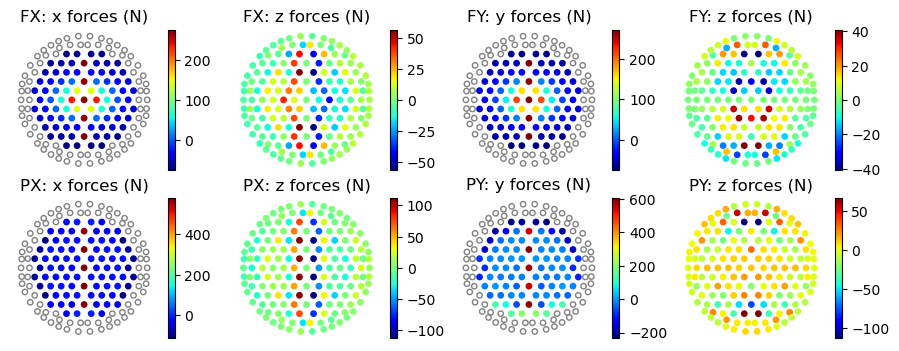

In [10]:
idx_triple = idx_triple = saz<0.03
idx_triple = idx_triple[:-5]
fig, ax = plt.subplots(2,4,figsize=(11,4))
i = 0
for modeID in ['FX', 'FY', 'PX', 'PY']:
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i+=1
    
    if modeID == 'FX':
        aa = FXx
        bb = FXz
    elif modeID == 'FY':
        aa = FYy
        bb = FYz
    elif modeID == 'PX':
        aa = PXx
        bb = PXz
    elif modeID == 'PY':
        aa = PYy
        bb = PYz
        
    img = ax[irow][icol].scatter(sax[:-5][idx_triple], say[:-5][idx_triple],15, aa)
    ax[irow][icol].scatter(sax[:-5][~idx_triple], say[:-5][~idx_triple], 15, edgecolors='grey', facecolors='none')
    ax[irow][icol].set_title('%s: %s forces (N)'%(modeID, modeID[1].lower()))
    cbar = fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].axis('equal')
    ax[irow][icol].axis('off')
    
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i+=1
    img = ax[irow][icol].scatter(sax[:-5], say[:-5], 15, bb)
    ax[irow][icol].set_title('%s: z forces (N)'%modeID)
    cbar = fig.colorbar(img, ax=ax[irow][icol])
    
    ax[irow][icol].axis('equal')
    ax[irow][icol].axis('off')

### Testing data

In [11]:
_, filesetM = parse_ml_data_folder('%s/Sec 20/'%(ml_data_dir))

x 250314_5/250314 GMT3 set5avg 20.2 6-7-13 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5
x 250314_5/250314 GMT3 set5avg 20.2 6-7-13 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5
x 250314_2/250314 GMT3 set2avg 20.2 4-13 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5
x 250314_2/250314 GMT3 set2avg 20.2 4-13 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5
x 250314_3/250314 GMT3 set3avg 20.2 6-7-13 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5
x 250314_3/250314 GMT3 set3avg 20.2 6-7-13 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5
x 250314_4/250314 GMT3 set4avg 20.2 6-7-13 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5
x 250314_4/250314 GMT3 set4avg 20.2 6-7-13 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5
Fri Mar 14 14:23:29 2025 	 250314_0/250314 GMT3 set0avg 20.2 2 init gmtMorph170614 LFSsub comp -.h5
Fri Mar 14 14:38:21 2025 	 250314_1/

In [12]:
dateID = '250326'

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 20/250326/250326 GMT3 set1 20.2 5 FX gmtMorph170614 -.h5: Wed Mar 26 13:17:18 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 20/250326/250326 GMT3 set1 20.2 5 FX0 gmtMorph170614 -.h5: Wed Mar 26 13:21:33 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 20/250326/250326 GMT3 set2 20.2 5 FX0 gmtMorph170614 -.h5: Wed Mar 26 13:24:53 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 20/250326/250326 GMT3 set2 20.2 5 FX gmtMorph170614 -.h5: Wed Mar 26 13:29:13 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 20/250326/250326 GMT3 set1 20.2 10 FY gmtMorph170614 -.h5: Wed Mar 26 13:34:25 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 20/250326/250326 GMT3 set1 20.2 10 FY0 gmtMorph170614 -.h5: Wed Mar 26 13:38:48 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 20/250326/250326 GMT3 set2 20

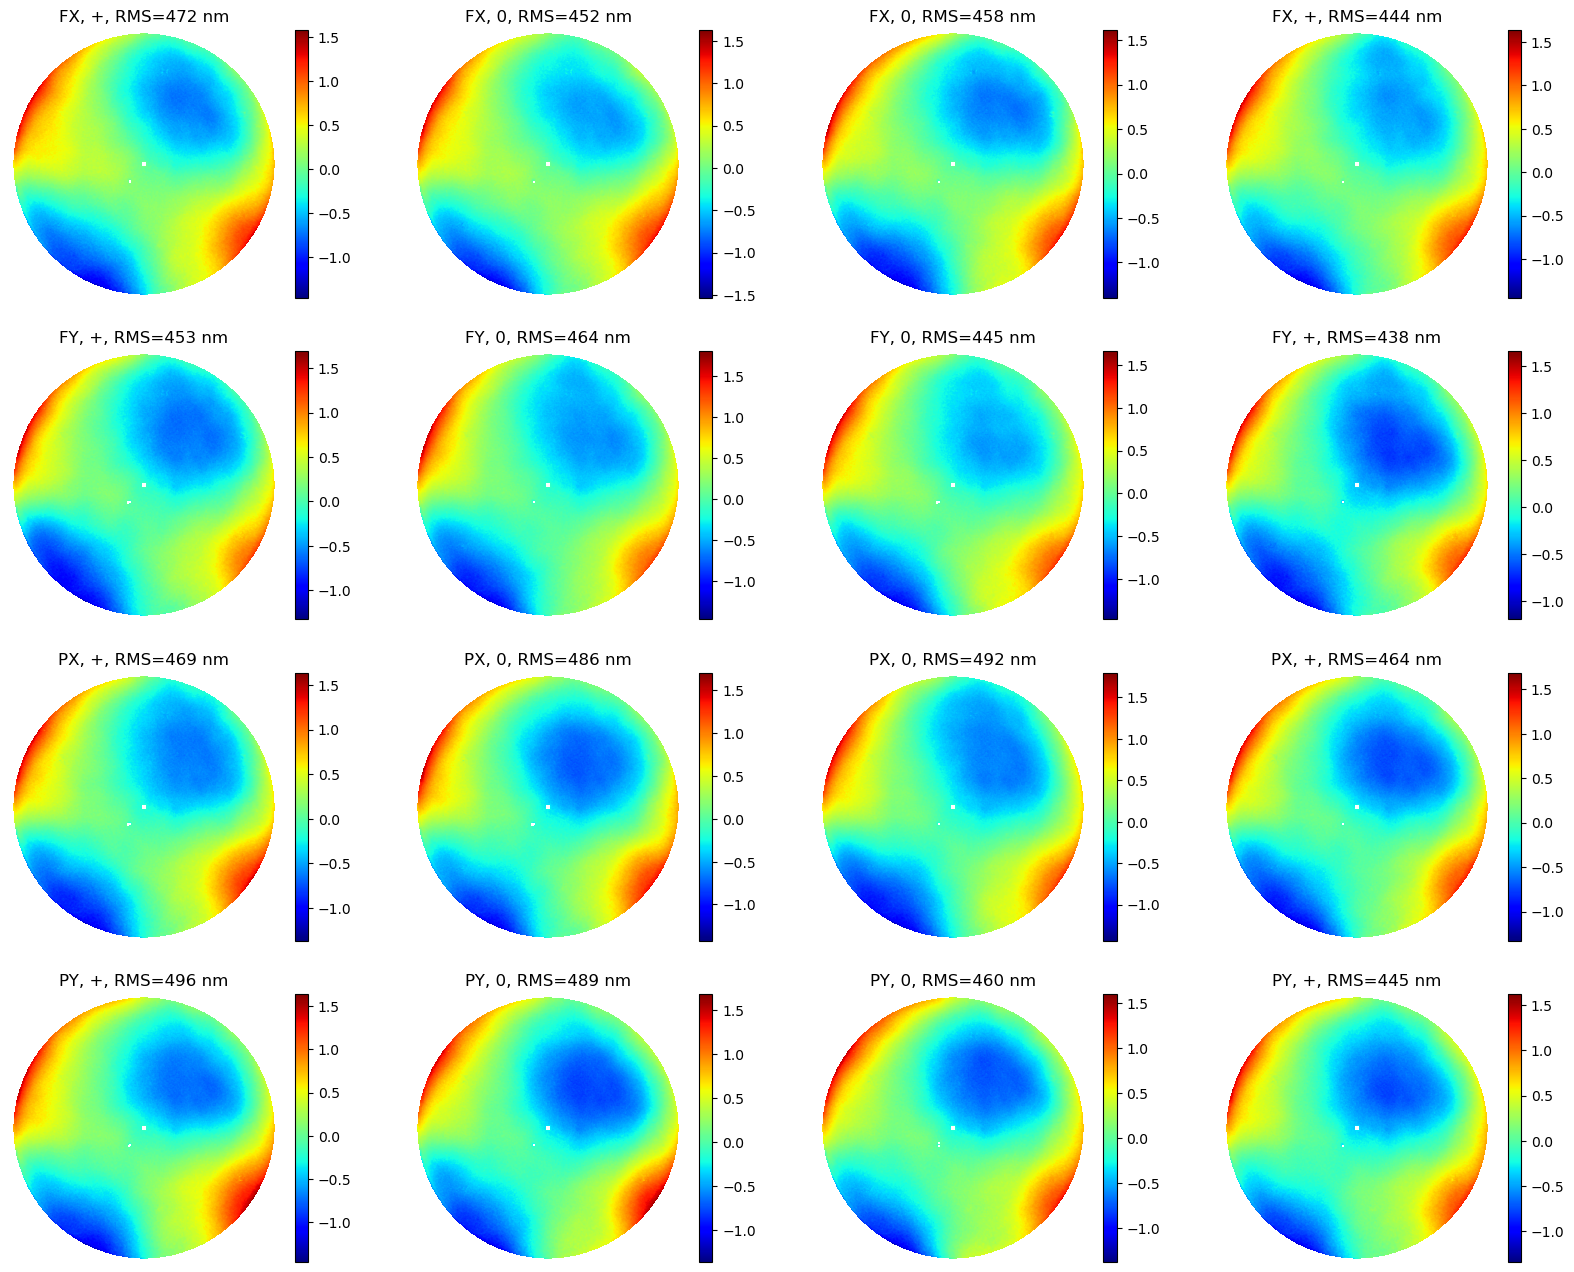

In [13]:
#look at all the +00+ maps, everything in h5 CS
nmode = 4
ts_array = []
fig, ax = plt.subplots(nmode,4,figsize=(20,4*nmode))
i = 0
for modeID in ['FX', 'FY', 'PX', 'PY']:
    signedBend = ['set1*%s '%modeID, 'set1*%s0'%modeID, 'set2*%s0'%modeID, 'set2*%s '%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        
        globstring = '%s/Sec 20/%s/*%s*.h5'%(ml_data_dir, dateID, bend) #not using dateID. Data split into 0117 and 0121
            
        #print('??  ', globstring)
        fileset = sorted(glob.glob(globstring))
        assert len(fileset)==1
        m1s,centerRow,centerCol,pixelSize, ts = readH5Map(fileset)
        ts_array.append(ts)
        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m1s, origin='lower')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%s, %s, RMS=%.0f nm'%(modeID, '+' if bend[-1]==' ' else '0', m1rms))
        ax[irow][icol].axis('off')

In [14]:
len(ts_array)/4

4.0

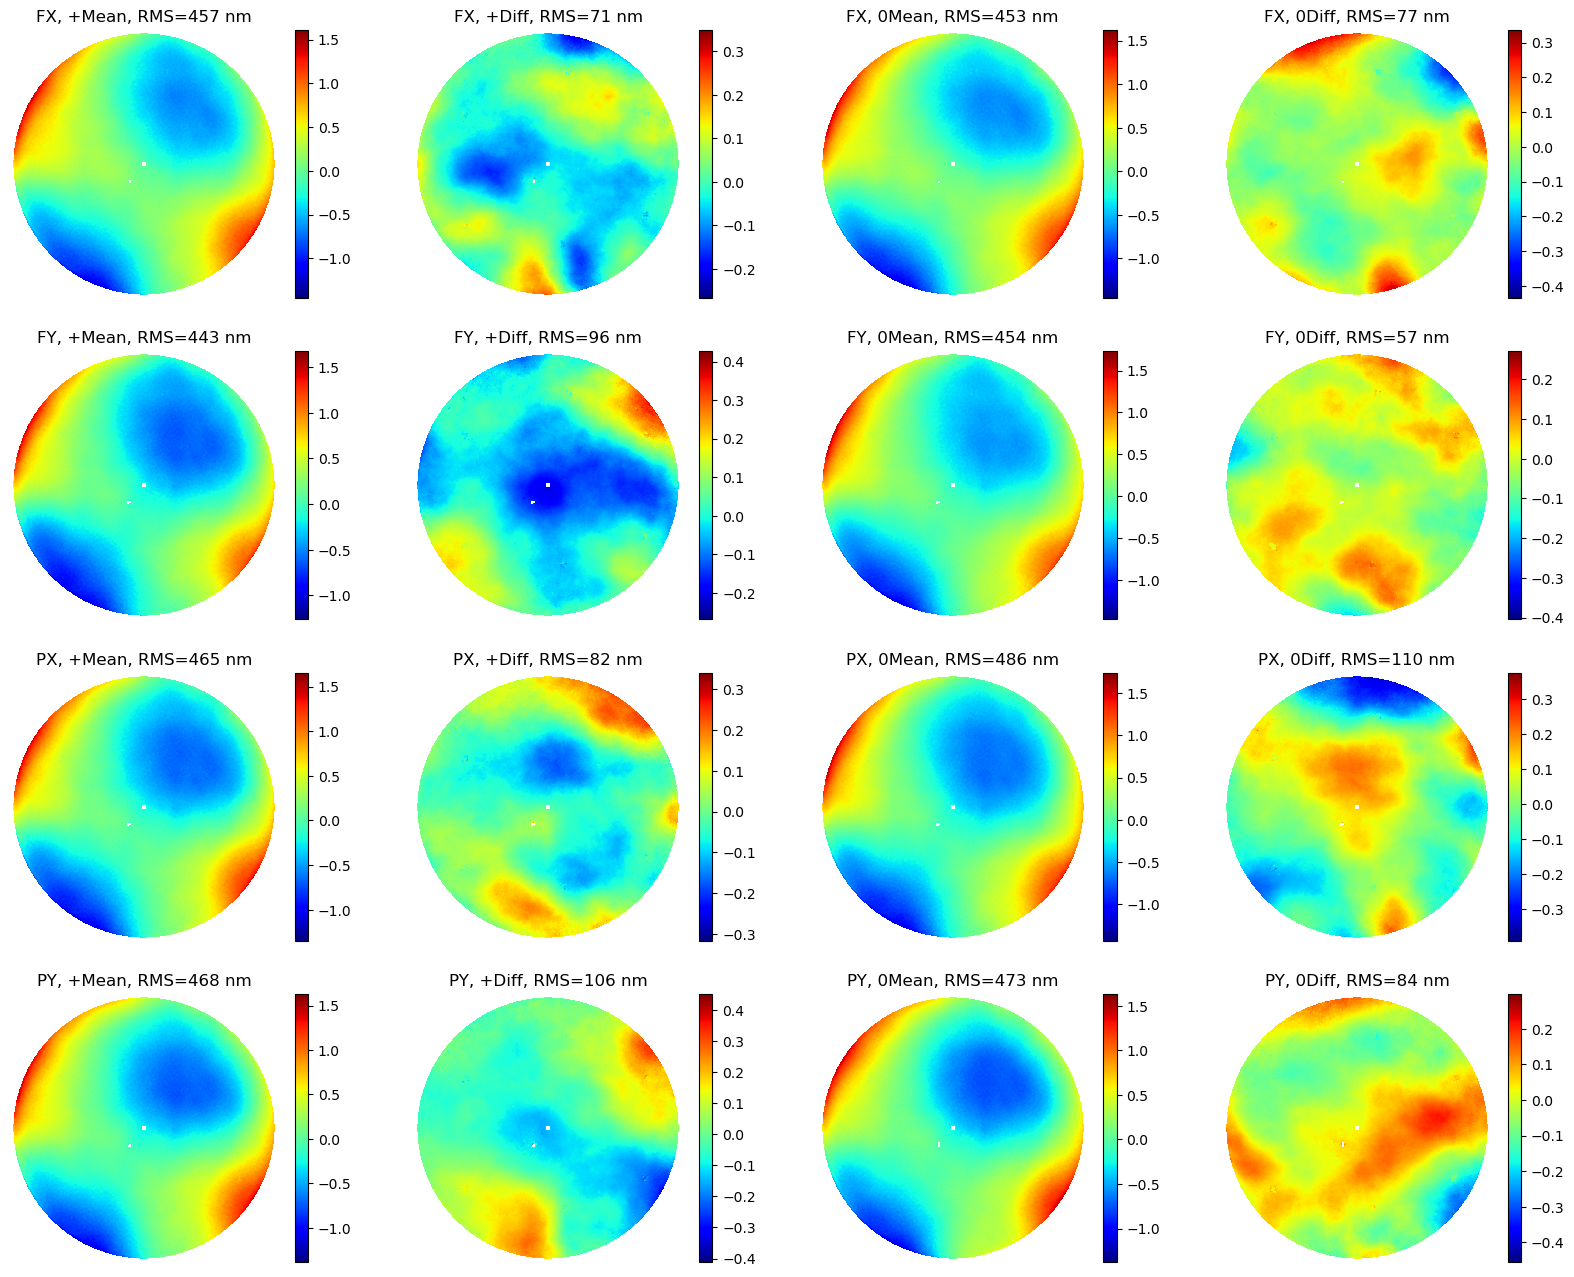

In [15]:
#look at average and diff of each ++ pair and each 00 pair; all in h5 CS
stats = np.zeros((4, nmode))
fig, ax = plt.subplots(nmode,4,figsize=(20,4*nmode))
i = 0
for ii, modeID in enumerate(['FX', 'FY', 'PX', 'PY']):
    signedBend = ['set1*%s '%modeID, 'set1*%s0'%modeID, 'set2*%s0'%modeID, 'set2*%s '%modeID]
    aveplus = np.zeros_like(m1s)
    aveminus = np.zeros_like(m1s)
    diffplus = np.zeros_like(m1s)
    diffminus = np.zeros_like(m1s)

    for bend in signedBend:

        globstring = '%s/Sec 20/%s/*%s*.h5'%(ml_data_dir, dateID, bend) #not using dateID. Data split into 0117 and 0121
        #print(globstring)
        fileset = sorted(glob.glob(globstring))
        #print(fileset)
        assert len(fileset)==1
        m1s,centerRow,centerCol,pixelSize, ts = readH5Map(fileset, verbose=False)
        if bend[-1] == ' ': #this means it is not '0',
            aveplus += m1s
            if 'set1' in bend:
                diffplus -= m1s
            else:
                diffplus += m1s #set2 - set1
                aveplus /= 2
        else:
            aveminus += m1s
            if 'set1' in bend:
                diffminus -= m1s
            else:
                diffminus += m1s
                aveminus /= 2
    for j in range(4):
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        if j==0:
            m1s = aveplus
            img = ax[irow][icol].imshow(m1s, origin='lower')
            fig.colorbar(img, ax=ax[irow][icol])
            m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
            mytitle = '%s, +Mean, RMS=%.0f nm'%(modeID, m1rms)
        elif j==1:
            m1s = diffplus
            img = ax[irow][icol].imshow(m1s, origin='lower')
            fig.colorbar(img, ax=ax[irow][icol])
            m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
            mytitle = '%s, +Diff, RMS=%.0f nm'%(modeID, m1rms)           
        elif j==2:
            m1s = aveminus
            img = ax[irow][icol].imshow(m1s, origin='lower')
            fig.colorbar(img, ax=ax[irow][icol])
            m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
            mytitle = '%s, 0Mean, RMS=%.0f nm'%(modeID, m1rms)
        elif j==3:
            m1s = diffminus
            img = ax[irow][icol].imshow(m1s, origin='lower')
            fig.colorbar(img, ax=ax[irow][icol])
            m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
            mytitle = '%s, 0Diff, RMS=%.0f nm'%(modeID, m1rms)  
        ax[irow][icol].set_title(mytitle)
        ax[irow][icol].axis('off')
        stats[j, ii] = m1rms

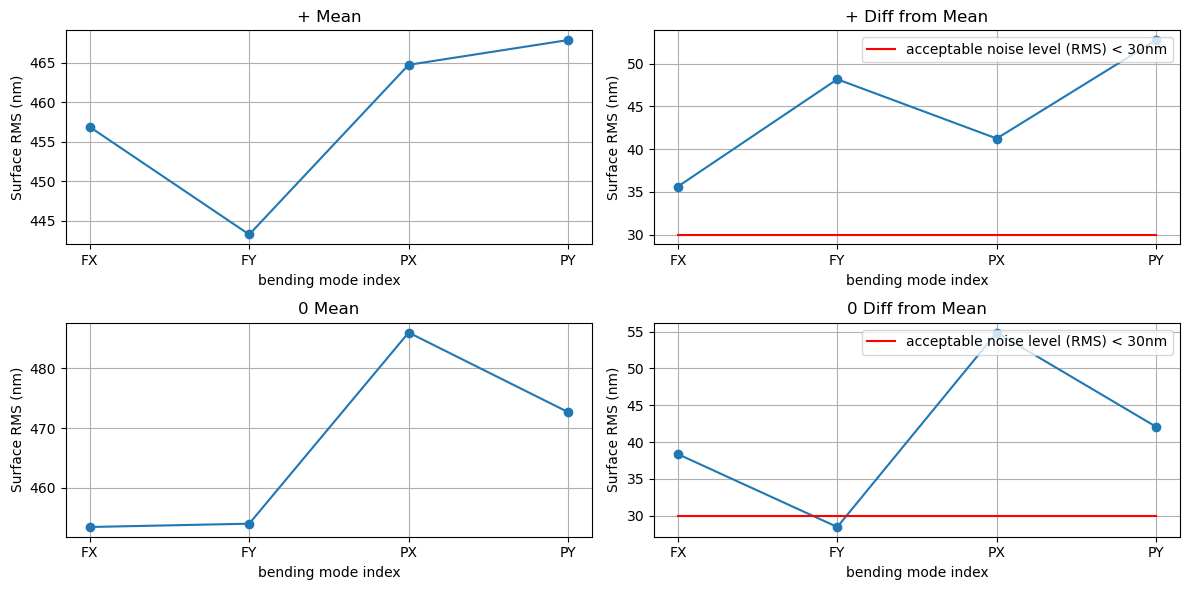

In [16]:
fig, ax = plt.subplots(2,2,figsize=(12, 6))
startmode = 1-1
endmode = 4-1
x0 = ['FX', 'FY', 'PX', 'PY']
i = 0
j = 0
ax[i][j].plot(x0, stats[0,:],'-o')
ax[i][j].grid()
ax[i][j].set_xlabel('bending mode index')
ax[i][j].set_title('+ Mean')
ax[i][j].set_ylabel('Surface RMS (nm)')
i = 0
j = 1
ax[i][j].plot(x0, stats[j,:]/2,'-o')
ax[i][j].plot([startmode, endmode],[30,30],'-r', label='acceptable noise level (RMS) < 30nm')
ax[i][j].grid()
ax[i][j].legend(loc='upper right')
ax[i][j].set_xlabel('bending mode index')
ax[i][j].set_title('+ Diff from Mean')
ax[i][j].set_ylabel('Surface RMS (nm)')
i = 1
j = 0
ax[i][j].plot(x0, stats[2,:],'-o')
ax[i][j].grid()
ax[i][j].set_xlabel('bending mode index')
ax[i][j].set_title('0 Mean')
ax[i][j].set_ylabel('Surface RMS (nm)')
i = 1
j = 1
ax[i][j].plot(x0, stats[3,:]/2,'-o')
ax[i][j].plot([startmode, endmode],[30,30],'-r', label='acceptable noise level (RMS) < 30nm')
ax[i][j].grid()
ax[i][j].legend(loc='upper right')
ax[i][j].set_xlabel('bending mode index')
ax[i][j].set_title('0 Diff from Mean')
ax[i][j].set_ylabel('Surface RMS (nm)')
plt.tight_layout()

In [17]:
bmMags = [1,1,1,1]

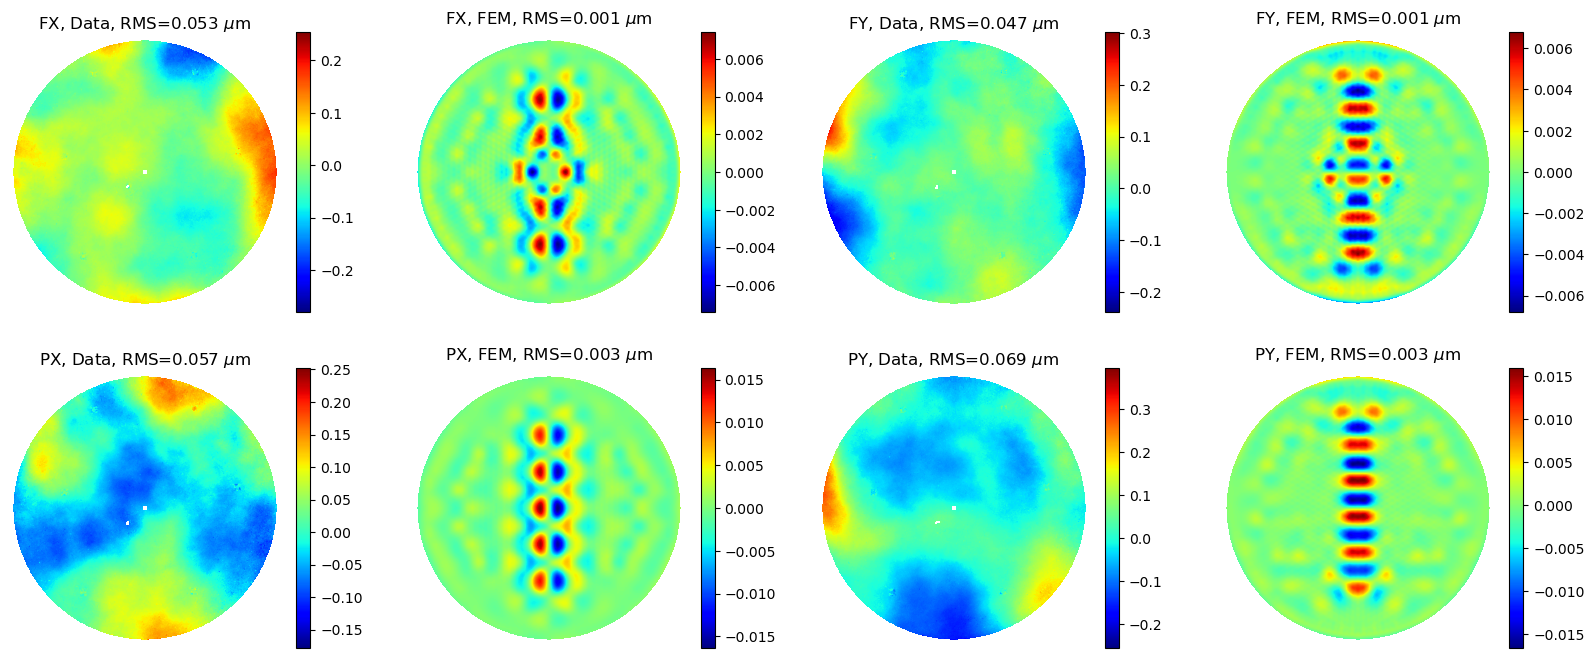

In [19]:
from scipy.interpolate import griddata

GMT_FEM = 1 #GMT FEM, used for side-by-side comparision with measured shapes

#ML FEM; at least visually, this doesn't seem to help; 
#The Afn_ml@VMat are not orthogonal, therefore cannot be used for decomposition.
#GMT_FEM = 0 #ML FEM

#[x1, y1] are the x and y grid in M1B. 
#CenterCol and centerRow are swapped, because they were meant for h5 CS
#Lines below, we will transpose the h5 map to match this.
#.  we will also reverse the sign of h5 maps to be in M1B.
[x1, y1] = mkXYGrid(m1s, centerCol, centerRow, pixelSize)

myBM = np.zeros((Sxn, Syn, nmode))
nrow = int(np.ceil(nmode/2.))
fig, ax = plt.subplots(nrow,4,figsize=(20,4*nrow))

i = 0
for ii, modeID in enumerate(x0):

    signedBend = ['set1*%s '%modeID, 'set1*%s0'%modeID, 'set2*%s0'%modeID, 'set2*%s '%modeID]
 
    for bend in signedBend:
        
        globstring = '%s/Sec 20/%s/*%s*.h5'%(ml_data_dir, dateID, bend) #not using dateID. Data split into 0117 and 0121

        #print(globstring)
        fileset = sorted(glob.glob(globstring))
        #print(fileset)
        assert len(fileset)==1
        m1s,centerRow,centerCol,pixelSize, ts = readH5Map(fileset, verbose=False)
        #m1s *= -1 # we are converting into M1B with myBM[] below
        if bend[-1] == ' ': #this means it is not '0',
            myBM[:,:,ii] += m1s
        else:
            myBM[:,:,ii] -= m1s
    myBM[:,:,ii] /= (2*bmMags[ii]) 
    myBM[:,:,ii] = -myBM[:,:,ii].T #convert into M1B
    
    m1s = myBM[:,:,ii-startmode]
    m1rms = np.std(m1s[~np.isnan(m1s)])

    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    
    img = ax[irow][icol].imshow(m1s, origin='lower')
    fig.colorbar(img, ax=ax[irow][icol])
    mytitle = r'%s, Data, RMS=%.3f $\mu$m'%(modeID, m1rms)
    ax[irow][icol].set_title(mytitle)
    ax[irow][icol].axis('off')
    
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    
    if modeID == 'FX':
        aa = UFX
    elif modeID == 'FY':
        aa = UFY
    elif modeID == 'PX':
        aa = UPX
    elif modeID == 'PY':
        aa = UPY        
    m1rms = np.std(aa[~np.isnan(aa)])
    grid_z = griddata((nodex, nodey), aa, (x1,y1), method='linear')

    #img = ax[irow][icol].scatter(nodex, nodey,10, UMat[:,modeID-1]) #scatter makes image sampling bad
    img = ax[irow][icol].imshow(grid_z, origin='lower')
    
    ax[irow][icol].set_title(r'%s, FEM, RMS=%.3f $\mu$m'%(modeID,m1rms))
    ax[irow][icol].axis('equal')
    ax[irow][icol].axis('off')
    fig.colorbar(img, ax=ax[irow][icol])
    
for i in range(nmode*2, nrow*4):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    ax[irow][icol].axis('off')

### fit to BMs and look at the residual

Note: this involve interpolation between grid; image sampling will not be as good as using Zernikes

In [20]:
endmode, nmode

(3, 4)

FX, Residual RMS = 0.007 micron
FY, Residual RMS = 0.007 micron
PX, Residual RMS = 0.008 micron
PY, Residual RMS = 0.008 micron


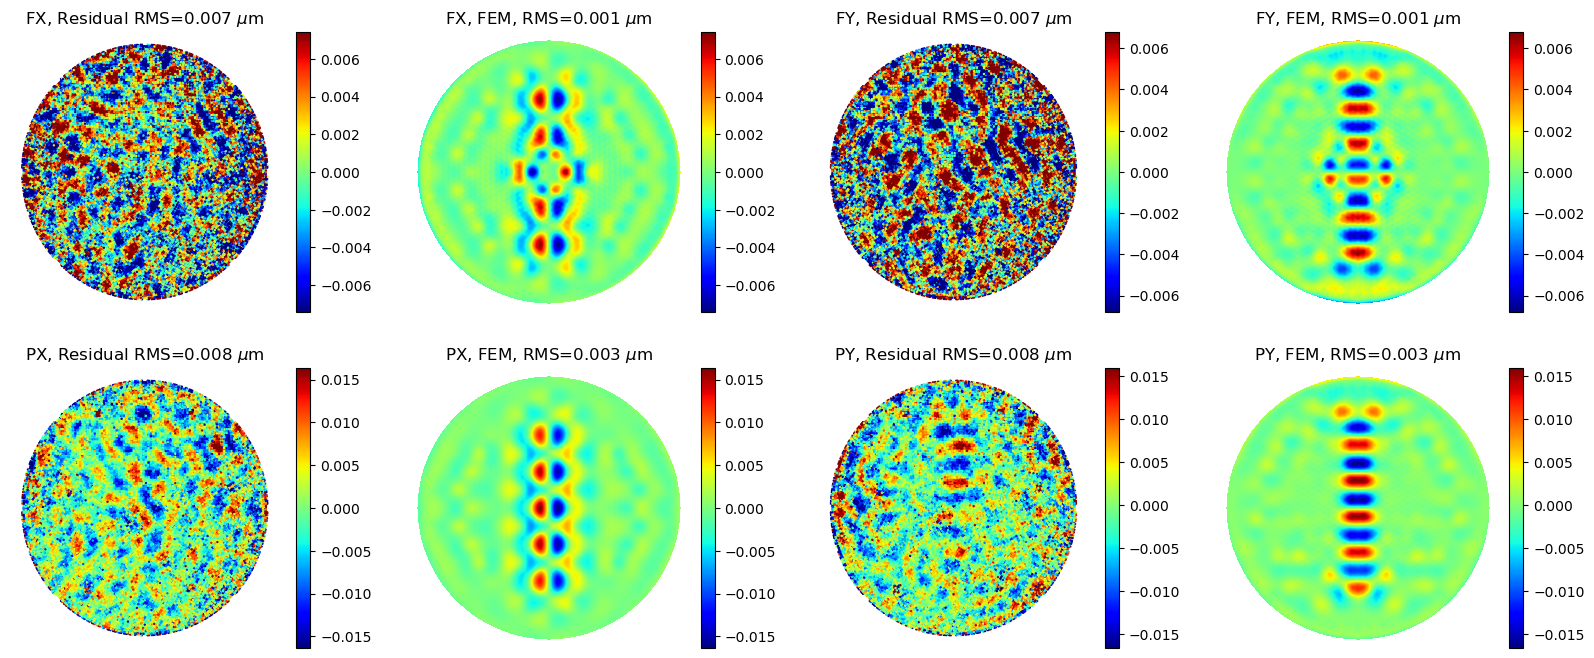

In [21]:
#This takes ~ minutes to run
from scipy.interpolate import LinearNDInterpolator 

nfitmode = 162
xtalk = np.zeros((nfitmode, endmode+1))

nrow = np.max((int(np.ceil(nmode/2.)),2)) #minimum 2 rows, or ax[irow][icol] won't work
fig, ax = plt.subplots(nrow,4,figsize=(20,4*nrow))
i = 0
for ii, modeID in enumerate(x0):

    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1

    bm2d = np.squeeze(myBM[:,:,ii]) #myIF is already in M1B, in nm
    mask = ~np.isnan(bm2d)

    interp = LinearNDInterpolator(list(zip(x1[mask], y1[mask])), bm2d[mask], fill_value=np.nan)
    mapOntoGMTFEgrid = interp(nodex, nodey).ravel()
    validIdx = ~np.isnan(mapOntoGMTFEgrid)
    xtalk[:,ii] = UMat[validIdx,:nfitmode].transpose() /np.sum(validIdx)  @ mapOntoGMTFEgrid[validIdx] #all in micron
    residual = mapOntoGMTFEgrid - UMat[:,:nfitmode] @ xtalk[:, ii] #this is residual in micron
    #only subtract that one mode
    #residual = mapOntoGMTFEgrid - UMat[:,modeID-1] * xtalk[modeID-1, modeID-1] #this is residual in micron
    
    m1rms = np.std(residual[~np.isnan(residual)]) #in micron
    mytitle = r'%s, Residual RMS = %.3f micron'%(modeID,  m1rms)
    print(mytitle)
    #img = ax[irow][icol].scatter(nodex, nodey, 10, residual)
    #fig.colorbar(img, ax=ax[irow][icol])
    mytitle = r'%s, Residual RMS=%.3f $\mu$m'%(modeID, m1rms)
    ax[irow][icol].set_title(mytitle)
    
    ###
    
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    
    if modeID == 'FX':
        aa = UFX
    elif modeID == 'FY':
        aa = UFY
    elif modeID == 'PX':
        aa = UPX
    elif modeID == 'PY':
        aa = UPY       
    m1rms = np.std(aa[~np.isnan(aa)])
    grid_z = griddata((nodex, nodey), aa, (x1,y1), method='linear')
    
    #img = ax[irow][icol].scatter(nodex, nodey,10, UMat[:,modeID-1]) #scatter makes image sampling bad
    img = ax[irow][icol].imshow(grid_z, origin='lower')
    
    ax[irow][icol].set_title(r'%s, FEM, RMS=%.3f $\mu$m'%(modeID,m1rms))
    ax[irow][icol].axis('equal')
    fig.colorbar(img, ax=ax[irow][icol])
    
    vmin, vmax = img.get_clim()
    img = ax[irow][icol-1].scatter(nodex, nodey, 0.5, residual, vmin=vmin, vmax=vmax)
    fig.colorbar(img, ax=ax[irow][icol-1])
    
for i in range(nrow*4):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    ax[irow][icol].axis('off')

### Fit to Zernikes

FX, Residual RMS = 0.006 micron
FY, Residual RMS = 0.007 micron
PX, Residual RMS = 0.007 micron
PY, Residual RMS = 0.007 micron


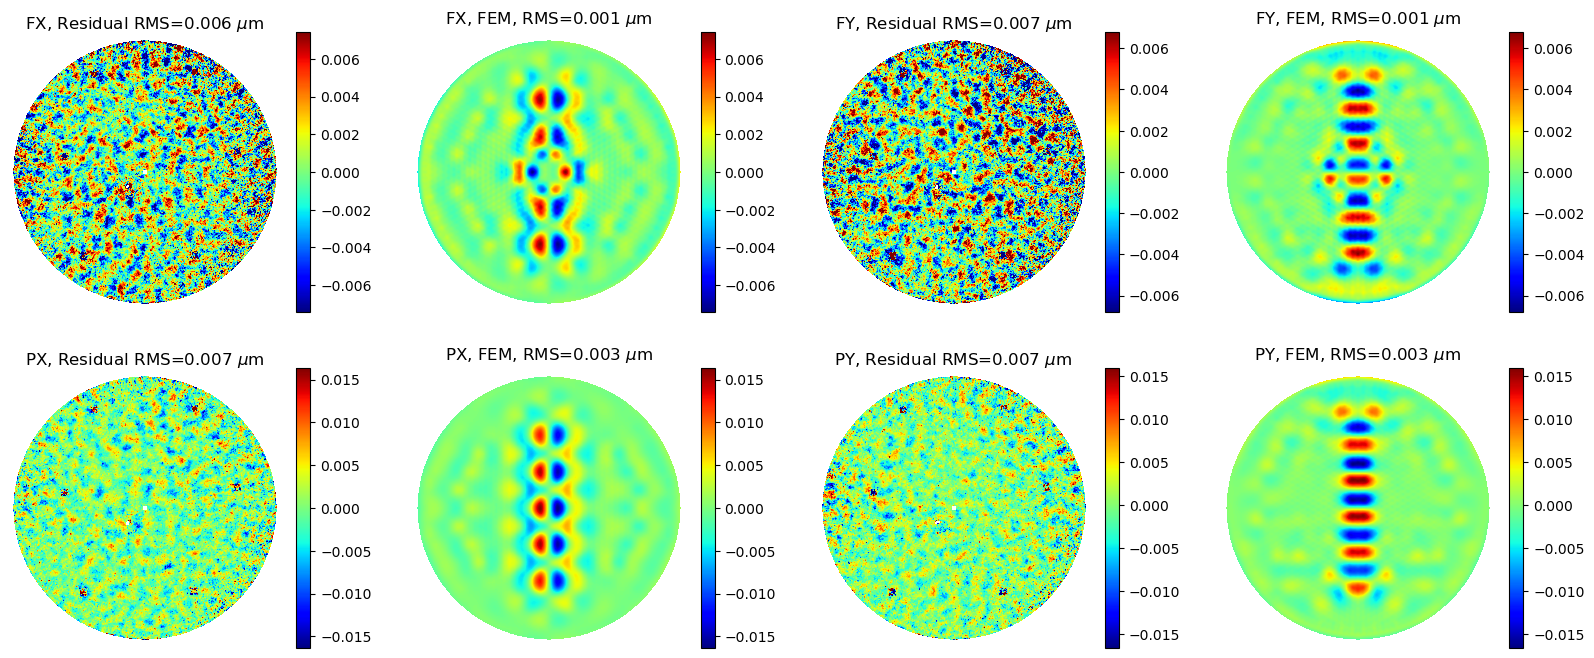

In [173]:
#This takes ~ minutes to run
from scipy.interpolate import LinearNDInterpolator 

nzer = 500 #int((8*9)/2+1) 
zercoeff = np.zeros((endmode+1, nzer))
r1 = np.sqrt(x1**2 + y1**2)

nnodes = x1.shape[0]*x1.shape[1]
zerU = np.zeros((nnodes, nzer))
for izer in range(nzer):
    zerU[:,izer] = zernike_polynomial(izer+1, x1/radius_of_CA, y1/radius_of_CA).flatten()

nrow = np.max((int(np.ceil(nmode/2.)),2)) #minimum 2 rows, or ax[irow][icol] won't work
fig, ax = plt.subplots(nrow,4,figsize=(20,4*nrow))
i = 0
for ii, modeID in enumerate(x0):

    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1

    bm2d = np.squeeze(myBM[:,:,ii]) #myIF is already in M1B, in nm
    maskNew = (~np.isnan(bm2d) ) & (r1<radius_of_CA)
    nnodesNew = np.sum(maskNew)
    zercoeff[ii,:] = zerU[maskNew.flatten(),:].transpose() / nnodesNew @ bm2d[maskNew]
    smoothed_image = np.zeros_like(bm2d)
    for izer in range(nzer):
        smoothed_image[maskNew] += zercoeff[ii,izer]*zerU[maskNew.flatten(),izer]
    smoothed_image[smoothed_image == 0] = np.nan

    residual = bm2d - smoothed_image
    #only subtract that one mode
    #residual = mapOntoGMTFEgrid - UMat[:,modeID-1] * xtalk[modeID-1, modeID-1] #this is residual in micron
    
    m1rms = np.std(residual[~np.isnan(residual)]) #in micron
    mytitle = r'%s, Residual RMS = %.3f micron'%(modeID,  m1rms)
    print(mytitle)
    #img = ax[irow][icol].scatter(nodex, nodey, 10, residual)
    #fig.colorbar(img, ax=ax[irow][icol])
    mytitle = r'%s, Residual RMS=%.3f $\mu$m'%(modeID, m1rms)
    ax[irow][icol].set_title(mytitle)
    
    ###
    
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    
    if modeID == 'FX':
        aa = UFX
    elif modeID == 'FY':
        aa = UFY
    elif modeID == 'PX':
        aa = UPX
    elif modeID == 'PY':
        aa = UPY       
    m1rms = np.std(aa[~np.isnan(aa)])
    grid_z = griddata((nodex, nodey), aa, (x1,y1), method='linear')
    
    #img = ax[irow][icol].scatter(nodex, nodey,10, UMat[:,modeID-1]) #scatter makes image sampling bad
    img = ax[irow][icol].imshow(grid_z, origin='lower')
    
    ax[irow][icol].set_title(r'%s, FEM, RMS=%.3f $\mu$m'%(modeID,m1rms))
    ax[irow][icol].axis('equal')
    fig.colorbar(img, ax=ax[irow][icol])
    
    vmin, vmax = img.get_clim()
    img = ax[irow][icol-1].imshow(residual, origin='lower', vmin=vmin, vmax=vmax)
    #img = ax[irow][icol-1].imshow(residual, origin='lower') #, vmin=vmin, vmax=vmax)
    fig.colorbar(img, ax=ax[irow][icol-1])
    
for i in range(nrow*4):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    ax[irow][icol].axis('off')

## Below was used for debugging the 3/24/25 data

### check the forces

In [128]:
ts_array

['Wed Mar 26 13:17:18 2025',
 'Wed Mar 26 13:21:33 2025',
 'Wed Mar 26 13:24:53 2025',
 'Wed Mar 26 13:29:13 2025',
 'Wed Mar 26 13:34:25 2025',
 'Wed Mar 26 13:38:48 2025',
 'Wed Mar 26 13:42:08 2025',
 'Wed Mar 26 13:46:42 2025',
 'Wed Mar 26 13:54:28 2025',
 'Wed Mar 26 13:58:23 2025',
 'Wed Mar 26 14:01:43 2025',
 'Wed Mar 26 14:06:03 2025',
 'Wed Mar 26 14:10:20 2025',
 'Wed Mar 26 14:14:30 2025',
 'Wed Mar 26 14:17:51 2025',
 'Wed Mar 26 14:21:55 2025']

In [129]:
t1 = 0
t2 = t1+1
t3 = t1+2
t4 = t1+3

In [130]:
print(t1, t2)
sa_force1, tt = getDBData(unix_ts(ts_array[t1])-120,'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=60, samples=120)
sa_force1_ave = np.mean(sa_force1,axis=0)
print(sa_force1.shape)
sa_force2, tt = getDBData(unix_ts(ts_array[t2])-120,'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=60, samples=120)
sa_force2_ave = np.mean(sa_force2,axis=0)
print(sa_force2.shape)
sa_force3, tt = getDBData(unix_ts(ts_array[t3])-120,'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=60, samples=120)
sa_force3_ave = np.mean(sa_force3,axis=0)
print(sa_force3.shape)
sa_force4, tt = getDBData(unix_ts(ts_array[t4])-120,'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=60, samples=120)
sa_force4_ave = np.mean(sa_force4,axis=0)
print(sa_force4.shape)

0 1
m1_s1_support_ctrl/s/sa_force/value
2025-03-26 13:15:18  duration =  60  s
(120, 170, 3)
(120, 170, 3)
m1_s1_support_ctrl/s/sa_force/value
2025-03-26 13:19:33  duration =  60  s
(120, 170, 3)
(120, 170, 3)
m1_s1_support_ctrl/s/sa_force/value
2025-03-26 13:22:53  duration =  60  s
(120, 170, 3)
(120, 170, 3)
m1_s1_support_ctrl/s/sa_force/value
2025-03-26 13:27:13  duration =  60  s
(120, 170, 3)
(120, 170, 3)


In [134]:
expectedF = gmt165Fvec2gmt170Fvec(-FXz)

input forces and output figure both in M1B


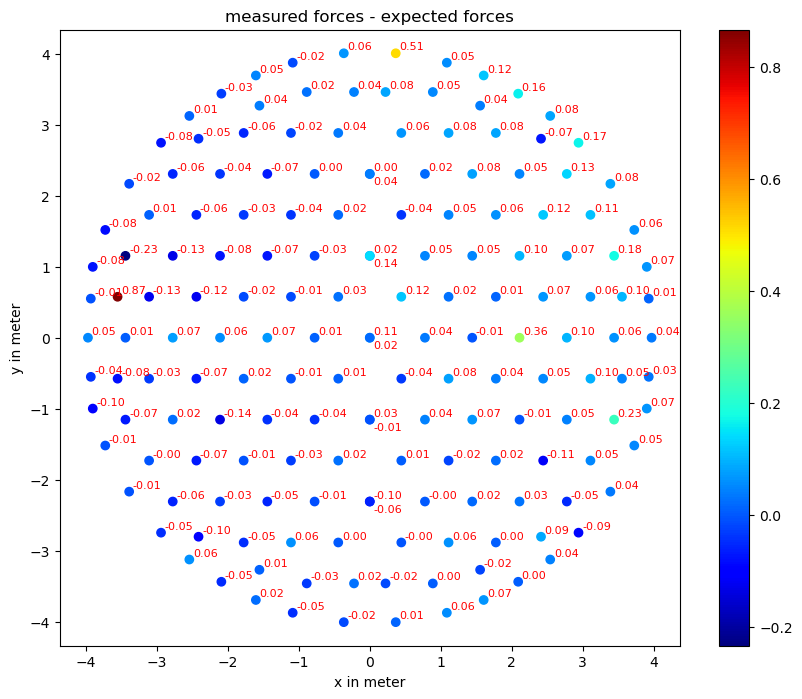

In [135]:
fdiff1 = (sa_force1_ave[:,2]-sa_force2_ave[:,2]) - expectedF*bmMags[0]
showForceMap_M1B(fdiff1, 'measured forces - expected forces', precision=2)
#showForceMap_M1B(expectedF*bmMags[0], 'bb')

input forces and output figure both in M1B


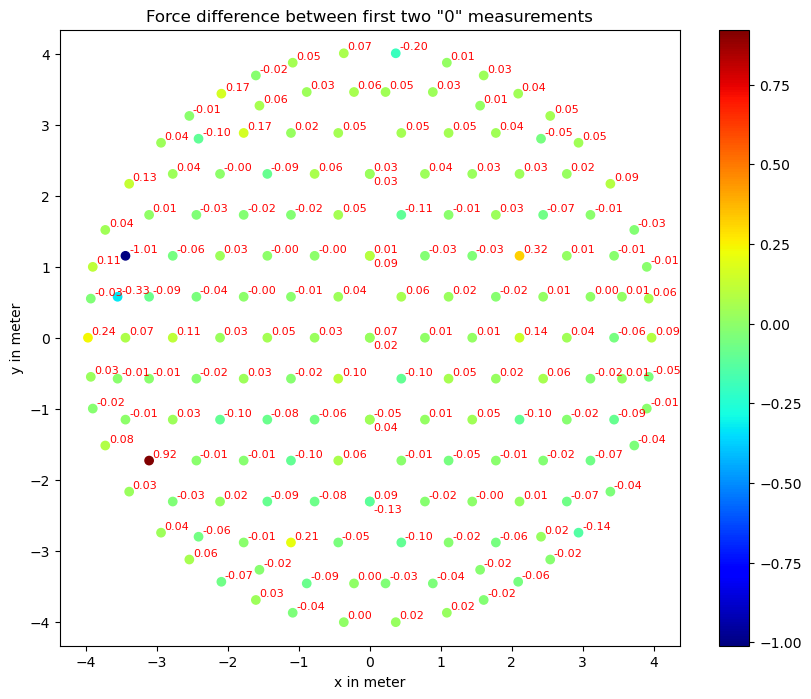

In [138]:
fdiff2 = (sa_force3_ave[:,2]-sa_force2_ave[:,2])# - expectedF*bmMags[0]
showForceMap_M1B(fdiff2, 'Force difference between first two "0" measurements', precision=2)

In [139]:
sa_force_all, tt = getDBData(unix_ts(ts_array[0])-120,'m1_s1_support_ctrl/s/sa_force/value', 
                             duration_in_s=unix_ts(ts_array[-1])-unix_ts(ts_array[0]), samples=120)
sa_force_all_ave = np.mean(sa_force_all,axis=0)
print(sa_force_all.shape)

m1_s1_support_ctrl/s/sa_force/value
2025-03-26 13:15:18  duration =  3877  s
(120, 170, 3)
(120, 170, 3)


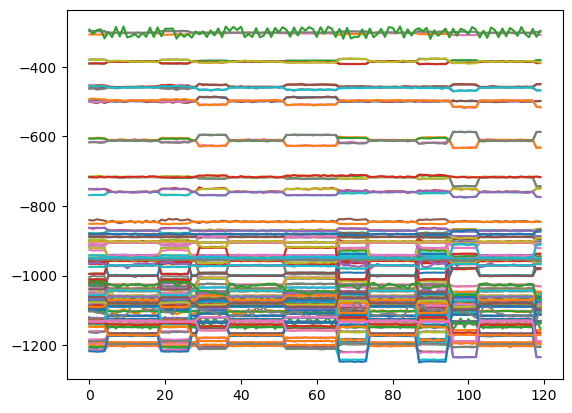

In [140]:
for i in range(nact):
    plt.plot(sa_force_all[:,i,2])

In [141]:
ts_array[-1]

'Wed Mar 26 14:21:55 2025'

In [142]:
sab_force_all, tt = getDBData(unix_ts(ts_array[0])-120,'m1_s1_support_ctrl/s/sa_bending_force/value', 
                             duration_in_s=unix_ts(ts_array[-1])-unix_ts(ts_array[0]), samples=120)
print(sab_force_all.shape)

m1_s1_support_ctrl/s/sa_bending_force/value
2025-03-26 13:15:18  duration =  3877  s
(120, 170, 3)
(120, 170, 3)


Text(0.5, 0, 'time (in minutes)')

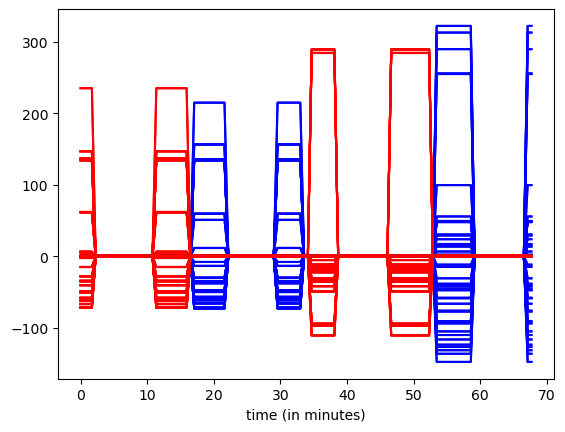

In [111]:
for i in range(nact):
    plt.plot((tt-tt[0])/60., sab_force_all[:,i,0],'-r')   
for i in range(nact):
    plt.plot((tt-tt[0])/60., sab_force_all[:,i,1],'-b')
for i in range(nact):
    plt.plot((tt-tt[0])/60., sab_force_all[:,i,2],'-k')    
plt.xlabel('time (in minutes)')

In [96]:
tt[-1]-tt[0]

4061.8999531269073

In [97]:
zb, tt = getDBData(unix_ts(ts_array[0])-120,'m1_s1_support_ctrl/s/z_bending_mode/value', 
                             duration_in_s=unix_ts(ts_array[-1])-unix_ts(ts_array[0]), samples=120)
print(zb.shape)

m1_s1_support_ctrl/s/z_bending_mode/value
2025-03-24 11:41:33  duration =  4096  s
(120, 165)
(120, 165)


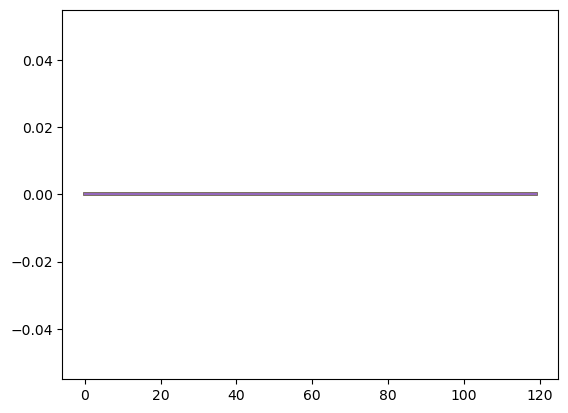

In [99]:
for i in range(zb.shape[1]):
    plt.plot(zb[:,i])